<a href="https://colab.research.google.com/github/alisonqiu/-Fueling-Clean-Initiatives/blob/main/final_datathon_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Description
Chevron is continuously looking for renewable energy businesses, initiatives, and start-ups to potentially invest in as part of their energy transition strategy. With each year, this task of narrowing down prospective collaborators becomes trickier and more difficult as the national investment in clean energy explodes throughout the United States. With the idea that the greater the investment in a state, the more likely Chevron is to find collaborators and companies of interest within that state, Chevron will narrow down the list of states to look for potential investments within using predictions for the amount of renewable energy investment dollars each state will be given.
#Objective

Provided that it is the year 2019, Chevron is planning for the next year and needs to know which US states seem most promising with regards to renewable investments. In this Data Science Challenge, you are tasked with developing a model to predict:
**The Renewable Energy Investments ($) of each US state for 2020**.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# allows you to view the plots upon executing your code
%matplotlib inline
# sets the plotting style
plt.style.use('fivethirtyeight')
# prevents histogram bars to fuse together
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns
import warnings
# ignores warning message
warnings.filterwarnings('ignore')
# change max column display option
pd.options.display.max_columns = 50


# Data and Data Exploration

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Chevron/Train/Investment_Data_Train.xlsx',index_col=None)

In [ ]:
df.head()

,Unnamed: 0,MSN,StateCode,Year,Amount,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
0,0,BDFDB,AK,2015,21.0,Alaska,35.027804,16.0,3345612.0
1,1,BDPRP,AK,2015,4.0,Alaska,35.027804,16.0,3345612.0
2,2,BFFDB,AK,2015,21.0,Alaska,35.027804,16.0,3345612.0
3,3,BFPRP,AK,2015,4.0,Alaska,35.027804,16.0,3345612.0
4,4,CLPRB,AK,2015,17747.0,Alaska,35.027804,16.0,3345612.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'MSN', 'StateCode', 'Year', 'Amount', 'State',
       'CO2 Emissions (Mmt)', 'TotalNumberofInvestments',
       'TotalAmountofAssistance'],
      dtype='object')

In [ ]:
# check to see if there are null values, and then dropped the corresponding rows
df.isnull().sum()

Unnamed: 0                    0
MSN                           0
StateCode                     0
Year                          0
Amount                        0
State                         0
CO2 Emissions (Mmt)         200
TotalNumberofInvestments    345
TotalAmountofAssistance     345
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595 entries, 0 to 7594
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7595 non-null   int64  
 1   MSN                       7595 non-null   object 
 2   StateCode                 7595 non-null   object 
 3   Year                      7595 non-null   int64  
 4   Amount                    7595 non-null   float64
 5   State                     7595 non-null   object 
 6   CO2 Emissions (Mmt)       7395 non-null   float64
 7   TotalNumberofInvestments  7250 non-null   float64
 8   TotalAmountofAssistance   7250 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 534.1+ KB


In [ ]:
df.describe()

,Unnamed: 0,Year,Amount,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
count,7595.00000,7595.000000,7.595000e+03,7395.000000,7250.000000,7.250000e+03
mean,3797.00000,2017.000000,4.512532e+05,102.132160,111.692000,1.660597e+07
std,2192.63198,1.414307,3.864140e+06,106.775497,145.556997,4.487887e+07
min,0.00000,2015.000000,0.000000e+00,2.585183,10.000000,5.408200e+04
25%,1898.50000,2016.000000,1.015000e+00,38.790383,38.000000,1.102457e+06
50%,3797.00000,2017.000000,3.513000e+03,76.303579,63.500000,2.447825e+06
75%,5695.50000,2018.000000,6.793100e+04,122.771335,119.000000,6.155856e+06
max,7594.00000,2019.000000,1.015238e+08,684.689594,1023.000000,3.156357e+08


In [ ]:
#drop rows where State is United States, Federal Offshore - Gulf of Mexico, Federal Offshore - Pacific, District of Columbia
df = df[~df["State"].isin(["United States", "Federal Offshore - Gulf of Mexico", "Federal Offshore - Pacific", "District of Columbia"])]

In [ ]:
df.isnull().sum()

Unnamed: 0                  0
MSN                         0
StateCode                   0
Year                        0
Amount                      0
State                       0
CO2 Emissions (Mmt)         0
TotalNumberofInvestments    0
TotalAmountofAssistance     0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'MSN', 'StateCode', 'Year', 'Amount', 'State',
       'CO2 Emissions (Mmt)', 'TotalNumberofInvestments',
       'TotalAmountofAssistance'],
      dtype='object')

In [ ]:
# supplemental dataset
ev = pd.read_csv("/content/drive/MyDrive/Classroom/Alternative Fuel Stations Count.csv")
# ev = pd.read_csv("/content/drive/MyDrive/Datathon2023/ASFuelCountCSV.csv")
ev.drop(columns = "Unnamed: 1")

,State,2015,2016,2017,2018,2019,2020
0,Alabama,375,390,489,558,651,736
1,Alaska,11,13,19,18,40,49
2,Arizona,"1,059","1,254","1,290","1,447","1,690","1,989"
3,Arkansas,182,203,217,224,394,455
4,California,"11,242","14,969","17,426","22,010","28,038","35,527"
5,Colorado,921,"1,201","1,590","1,986","2,697","3,417"
6,Connecticut,542,774,838,889,"1,093","1,283"
7,Delaware,67,80,115,145,186,220
8,District of Columbia,246,258,272,346,566,713
9,Florida,"2,006","2,429","2,802","3,330","4,858","5,794"


In [ ]:
ev.columns

Index(['State', 'Unnamed: 1', '2015', '2016', '2017', '2018', '2019', '2020'], dtype='object')

In [ ]:
# function for processing test data
def process_test(df,ev):
  df = df[~df["State"].isin(["United States", "Federal Offshore - Gulf of Mexico", "Federal Offshore - Pacific", "District of Columbia"])]
  #df_msn = []
  year = 2020
  df_year = df[df["Year"]== year]
  #df_group = df_year.groupby(["State",'MSN'])['Amount'].sum().unstack()

  df = pd.merge(df, ev, on='State')
  df["ev_count"] = df.apply(lambda x: x[str(x["Year"])], axis =1)
  df["ev_count"] = df["ev_count"].apply(lambda x: x.replace(',',''))
  df.dropna()
  df.drop(columns = ["Unnamed: 1","Unnamed: 0",	'2015', '2016', '2017', '2018', '2019', '2020'], inplace = True)
  return df

In [ ]:
# combine with supplemental data 
df = pd.merge(df, ev, on='State')
df["ev_count"] = df["ev_count"].apply(lambda x: x.replace(',',''))
df.dropna()
df.drop(columns = ["Unnamed: 1",	'2015', '2016', '2017', '2018', '2019', '2020'], inplace = True)
# this is the final data frame we decided to use for training data
df.to_csv("/content/drive/MyDrive/Classroom/df_noconcate.csv",index=False)


In [ ]:
df

,MSN,StateCode,Year,Amount,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,ev_count
0,BDFDB,AK,2015,21.0,Alaska,35.027804,16.0,3345612.0,11
1,BDPRP,AK,2015,4.0,Alaska,35.027804,16.0,3345612.0,11
2,BFFDB,AK,2015,21.0,Alaska,35.027804,16.0,3345612.0,11
3,BFPRP,AK,2015,4.0,Alaska,35.027804,16.0,3345612.0,11
4,CLPRB,AK,2015,17747.0,Alaska,35.027804,16.0,3345612.0,11
...,...,...,...,...,...,...,...,...,...
7245,WDPRB,WY,2019,4969.0,Wyoming,59.096649,32.0,570570.0,203
7246,WDTCB,WY,2019,4969.0,Wyoming,59.096649,32.0,570570.0,203
7247,WSTCB,WY,2019,0.0,Wyoming,59.096649,32.0,570570.0,203
7248,WWPRB,WY,2019,4969.0,Wyoming,59.096649,32.0,570570.0,203


In [ ]:
#again didn't use this
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


# Create an instance of the StandardScaler
scaler = StandardScaler()
col_names = ['BDFDB', 'BDPRP', 'BFFDB', 'BFPRP', 'CLPRB',
       'CLPRK', 'CLPRP', 'COPRK', 'EMFDB', 'ENPRP', 'GETCB', 'HYTCB', 'NCPRB',
       'NGMPB', 'NGMPK', 'NGMPP', 'NUETB', 'PAPRB', 'PAPRP', 'REPRB', 'SOTCB',
       'TEPRB', 'TETCB', 'WDEXB', 'WDPRB', 'WDTCB', 'WSTCB', 'WWPRB', 'WYTCB']


for col in col_names:
  transf = df[col].values.reshape(-1,1)
  scaler = StandardScaler().fit(transf)
  df[col] = scaler.transform(transf)



## EDA and Visualizations


analyze the historical data in the dataframe. 
want to look at patterns in the investment and assistance amounts over time, and also see if there are any specific states that have a higher or lower investment or assistance amount.

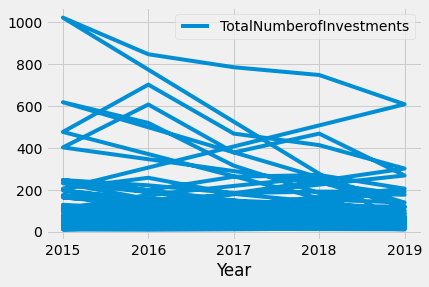

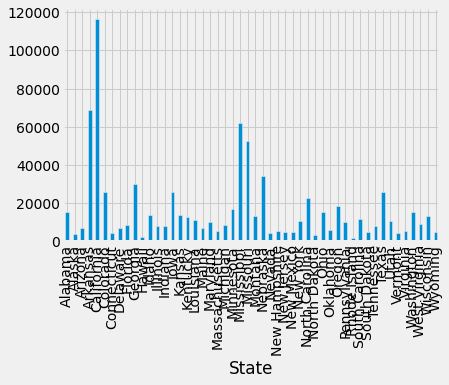

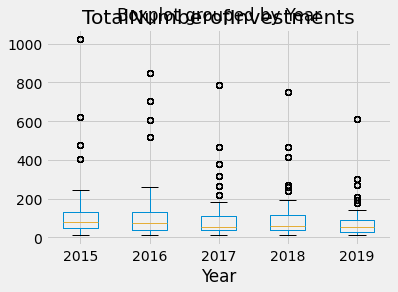

In [ ]:
df.plot(x="Year", y="TotalNumberofInvestments")
plt.show()

# a bar chart of investment amount by state
df.groupby("State").sum()["TotalNumberofInvestments"].plot(kind="bar")
plt.show()

# Create a boxplot of investment amount by year

df.boxplot(column="TotalNumberofInvestments", by="Year")
plt.show()

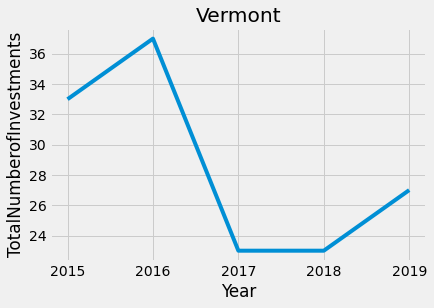

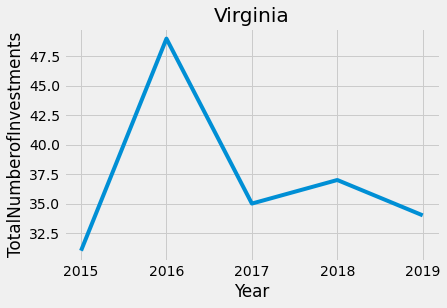

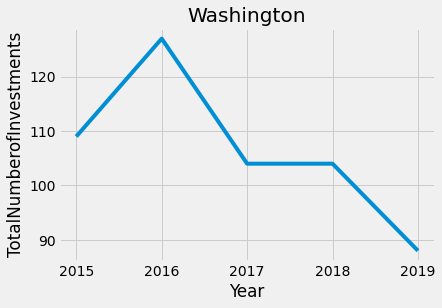

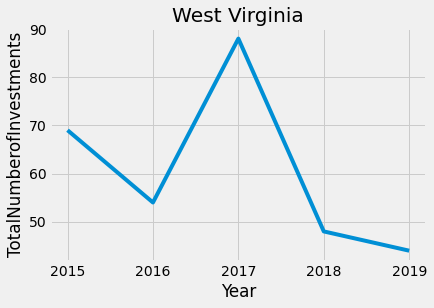

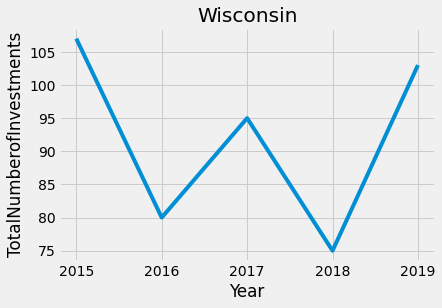

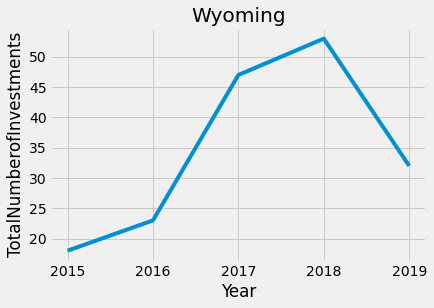

In [ ]:

# Group by state
states = df.groupby("State")
plt.subplot(1,2,2)

# Iterate through each state and create a line plot
for state, data in states:
    plt.plot(data["Year"], data["TotalNumberofInvestments"])
    plt.title(state)
    plt.xlabel("Year")
    plt.ylabel("TotalNumberofInvestments")
    plt.show()

In [ ]:
import plotly.express as px
fig = px.choropleth(df,
                    locations='StateCode', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='CO2 Emissions (Mmt)',
                    #range_color = (min(df['T']), max(df['Amount'])),
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

# Methods and Models

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Classroom/df_noconcate.csv")

Linear regression is a simple technique and it might not be the best approach to predict the amount of investment for the current year for each state, tried time series forecasting, then emsemble

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# parameter grid
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

# Create a random forest regressor
rf = RandomForestRegressor()

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
X_train = df.drop(columns = ["TotalAmountofAssistance","State","StateCode","MSN"])
y_train = df["TotalAmountofAssistance"]
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Create a new random forest regressor with the best parameters
rf_best = RandomForestRegressor(**grid_search.best_params_)

Best parameters:  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  -0.862271752720132


In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


states = df.groupby("State")

i = 0
# Iterate through each state
for state, data in states:

    # Create a new dataframe with the TotalAmountofAssistance and year columns
    ts_df = data[['Year','TotalAmountofAssistance']]

    # Set the year column as the index
    ts_df.set_index('Year', inplace=True)

    # Use the 'TotalAmountofAssistance' column as the time series data
    ts = ts_df['TotalAmountofAssistance']

    # Fit the ARIMA model
    model = sm.tsa.statespace.SARIMAX(ts, order=(1, 0, 0)) #(1, 0, 0)?
    results = model.fit()

    # Use the fitted model to predict investment in 2020
    investment_2020_ts = results.forecast(1).mean()
    #print("Investment for "+ state + " in 2020 TS: ", investment_2020_ts)

    X = data.drop(columns = ["TotalAmountofAssistance", "State","StateCode", "MSN"])
    y = data["TotalAmountofAssistance"]
    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


    # Fit the best model to the entire training data
    rf_best.fit(X_train, y_train)
    

    # Make predictions on new data
    investment_2020_rf = rf_best.predict(x_test)[1]
    #print("Investment for "+ state + " in 2020 RF: ", investment_2020_rf)


  
    final = investment_2020_ts * 0.1 + investment_2020_rf * 0.9
    print("Investment for "+ state + " in 2020 : ", final)


Investment for Alabama in 2020 :  839832.6427602766
Investment for Alaska in 2020 :  13727123.741049044
Investment for Arizona in 2020 :  95030743.43016349
Investment for Arkansas in 2020 :  59965855.028303444
Investment for California in 2020 :  158138234.84210557
Investment for Colorado in 2020 :  10771211.390890624
Investment for Connecticut in 2020 :  1305991.2532159125
Investment for Delaware in 2020 :  1484355.6315898274
Investment for Florida in 2020 :  52901472.67234306
Investment for Georgia in 2020 :  2369349.2013815073
Investment for Hawaii in 2020 :  328914.37013367127
Investment for Idaho in 2020 :  910186.4017666216
Investment for Illinois in 2020 :  11317491.48492666
Investment for Indiana in 2020 :  1590856.1284194398
Investment for Iowa in 2020 :  3039596.246675586
Investment for Kansas in 2020 :  992013.9079072705
Investment for Kentucky in 2020 :  1091044.2364458207
Investment for Louisiana in 2020 :  250418161.72644657
Investment for Maine in 2020 :  1092383.7296697

# Testing

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Classroom/Investment_Data_2020_withResponseVariable.csv")
test = process_test(test,ev)

In [ ]:
from sklearn.metrics import mean_squared_error

#---------------testing---------------
states = test.groupby("State")

i = 0
y_actual = []
y_predicted_tsrf = []

# Iterate through each state
for state, data in states:

  investment_2020_ts = results.forecast(1).mean()
  # y_predicted_ts.append(investment_2020_ts)


  X = data.drop(columns = ["TotalAmountofAssistance", "State","StateCode", "MSN"])
  y = data["TotalAmountofAssistance"]
  y_actual.append(data["TotalAmountofAssistance"].iloc[0])
  # X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

  rf_best.fit(X, y)
  # Make predictions on new data
  investment_2020_rf = rf_best.predict(X)[1]
  # y_predicted_rf.append(investment_2020_rf)
  # print("Investment for "+ state + " in 2020 RF: ", investment_2020_rf)


  final = investment_2020_ts * 0.1 + investment_2020_rf * 0.9
  y_predicted_tsrf.append(final)
  print("Investment for "+ state + " in 2020 : ", final)

#calculate rmse for emsemble
rms_tsrf = mean_squared_error(y_actual, y_predicted_tsrf, squared=False)
print("rms_tsrf: "+ str(rms_tsrf))



Investment for Alabama in 2020 :  1112993.192234594
Investment for Alaska in 2020 :  8666550.092234593
Investment for Arizona in 2020 :  21437010.992234595
Investment for Arkansas in 2020 :  55143316.89223459
Investment for California in 2020 :  52906090.5922346
Investment for Colorado in 2020 :  5729887.892234595
Investment for Connecticut in 2020 :  498658.59223459405
Investment for Delaware in 2020 :  21431341.892234597
Investment for Florida in 2020 :  7676985.692234594
Investment for Georgia in 2020 :  6632770.592234595
Investment for Hawaii in 2020 :  1094565.6922345941
Investment for Idaho in 2020 :  716622.392234594
Investment for Illinois in 2020 :  3230270.1922345944
Investment for Indiana in 2020 :  7756371.092234595
Investment for Iowa in 2020 :  57184561.89223459
Investment for Kansas in 2020 :  2578019.492234594
Investment for Kentucky in 2020 :  9997587.992234593
Investment for Louisiana in 2020 :  4710070.892234595
Investment for Maine in 2020 :  1603071.092234594
Inves

In [ ]:
#rms_tsrf = mean_squared_error(y_actual, y_predicted_tsrf, squared=True)
rms_tsrf = np.sqrt(mean_squared_error(y_actual, y_predicted_tsrf))
print("rms_tsrf: "+ str(rms_tsrf))

rms_tsrf: 3792126.116928248


In [ ]:
rmse = np.sqrt(np.mean((np.array(y_actual) - np.array(y_predicted_tsrf)) ** 2))
print("rms_tsrf: "+ str(rmse))

rms_tsrf: 3792126.116928248


In [ ]:
y_actual

[1174323.0,
 9567164.0,
 23756565.0,
 61208016.0,
 58722209.0,
 6304206.0,
 491729.0,
 23750266.0,
 8467648.0,
 7307409.0,
 1153848.0,
 733911.0,
 3526853.0,
 8555854.0,
 63476066.0,
 2802130.0,
 11046095.0,
 5171076.0,
 1718854.0,
 1459180.0,
 21021782.0,
 3543100.0,
 29357835.0,
 2102663.0,
 4677028.0,
 542585.0,
 9134015.0,
 53672.0,
 996776.0,
 428543.0,
 48503359.0,
 39346669.0,
 176369306.0,
 686913.0,
 3038155.0,
 560909.0,
 25808865.0,
 2136747.0,
 635939.0,
 145497267.0,
 6976448.0,
 1536871.0,
 39546994.0,
 736194.0,
 2405926.0,
 2039514.0,
 2509973.0,
 1052654.0,
 9860324.0,
 229763.0]

In [ ]:
#predicted assistance amount
y_predicted_tsrf

[1112993.192234594,
 8666550.092234593,
 21437010.992234595,
 55143316.89223459,
 52906090.5922346,
 5729887.892234595,
 498658.59223459405,
 21431341.892234597,
 7676985.692234594,
 6632770.592234595,
 1094565.6922345941,
 716622.392234594,
 3230270.1922345944,
 7756371.092234595,
 57184561.89223459,
 2578019.492234594,
 9997587.992234593,
 4710070.892234595,
 1603071.092234594,
 1369364.492234594,
 18975706.292234596,
 3244892.492234594,
 26478153.992234595,
 1948499.192234594,
 4265427.692234594,
 544428.992234594,
 8276715.992234594,
 104407.292234594,
 953200.892234594,
 441791.192234594,
 43709125.5922346,
 35468104.5922346,
 158788477.8922346,
 674324.192234594,
 2790441.992234594,
 560920.592234594,
 23284080.992234595,
 1979174.792234594,
 628447.5922345939,
 131003642.79223458,
 6334905.692234594,
 1439286.392234594,
 35648397.0922346,
 718677.0922345939,
 2221435.892234594,
 1891665.092234594,
 2315078.1922345944,
 1003491.0922345939,
 8930394.092234593,
 262889.192234594]

In [ ]:
predictions = [1112993.192234594,
 8666550.092234593,
 21437010.992234595,
 55143316.89223459,
 52906090.5922346,
 5729887.892234595,
 498658.59223459405,
 21431341.892234597,
 7676985.692234594,
 6632770.592234595,
 1094565.6922345941,
 716622.392234594,
 3230270.1922345944,
 7756371.092234595,
 57184561.89223459,
 2578019.492234594,
 9997587.992234593,
 4710070.892234595,
 1603071.092234594,
 1369364.492234594,
 18975706.292234596,
 3244892.492234594,
 26478153.992234595,
 1948499.192234594,
 4265427.692234594,
 544428.992234594,
 8276715.992234594,
 104407.292234594,
 953200.892234594,
 441791.192234594,
 43709125.5922346,
 35468104.5922346,
 158788477.8922346,
 674324.192234594,
 2790441.992234594,
 560920.592234594,
 23284080.992234595,
 1979174.792234594,
 628447.5922345939,
 131003642.79223458,
 6334905.692234594,
 1439286.392234594,
 35648397.0922346,
 718677.0922345939,
 2221435.892234594,
 1891665.092234594,
 2315078.1922345944,
 1003491.0922345939,
 8930394.092234593,
 262889.192234594]
type(predictions)

setStates = df['StateCode'][0:50]
print(setStates)

import plotly.express as px
fig = px.choropleth(df,
                    locations=setStates, 
                    locationmode="StateCode", 
                    scope="usa",
                    color=predictions,
                    #range_color = (min(df['T']), max(df['Amount'])),
                    color_continuous_scale="Viridis_r", 
                    
                    )
#fig.show()

# Notes
- challenge https://docs.google.com/document/d/1g8a4TJB7vUXJInR4412S3MaFsVv_zKil/edit
- for testing rmse 
https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
- dataset https://drive.google.com/drive/mobile/folders/1fuopyXHcseWobl57hXQo9vLzRqf5tygS?usp=sharing
- vizualization ideas
- supplemental dataset ideas
https://www.wctsservices.usda.gov/energy/maps/investment
- ev data: https://www.bts.gov/browse-statistical-products-and-data/state-transportation-statistics/alternative-fuel-stations
demand for electric vehicles warrants higher investment into alternative fuels